In [1]:
#!pip install torch
#!pip install einops
#!pip install ema_pytorch
#!pip install accelerate

In [2]:
from denoising_diffusion_pytorch import Unet, GaussianDiffusion, Trainer

model = Unet(
    dim = 64, #Just affects how many nodes are in our blocks
    dim_mults = (1, 2, 4)
).cuda()

#There is also an issue with the sampling step too
diffusion = GaussianDiffusion(
    model,
    image_size = 32,           #Try the other set instead
    timesteps = 1000,           # number of steps 
    sampling_timesteps = 250,   # number of sampling timesteps (using ddim for faster inference [see citation for ddim paper])
    loss_type = 'l1'            # L1 or L2
).cuda()

trainer = Trainer( # The data loader seems to be failing I think cause it couldn't access scratch/../cifar10 directly
    diffusion,
    '/scratch/vb2184/HPML_Project/Performance-Preserving-Optimization-of-Diffusion-Networks/cifar10/train', #Chexpert is a Grayscale Image
    train_batch_size = 128,
    train_lr = 2e-4,
    train_num_steps = 100000,         # total training steps
    gradient_accumulate_every = 2,    # gradient accumulation steps
    ema_decay = 0.995,                # exponential moving average decay
    amp = False                        # turn on mixed precision
)

#trainin_losses=trainer.train()

#This code version is capable of accessing data and then training iterations on it


/home/vb2184/.local/lib/python3.8/site-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 48 worker processes in total. Our suggested max number of worker in current system is 1, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [6]:
import torch
dummy_input = torch.randint(low=0, high=256, size=(128,3, 32, 32), dtype=torch.float32).cuda()
dummy_time=torch.tensor(64)
traced_model = torch.jit.trace(model,example_inputs=dummy_input)

AttributeError: 'int' object has no attribute 'device'

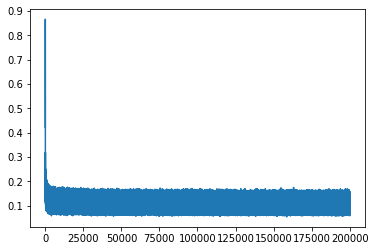

In [2]:
import matplotlib.pyplot as plt
plt.plot(trainin_losses)

sampling loop time step: 0it [00:00, ?it/s]

torch.Size([3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([3, 32, 32])


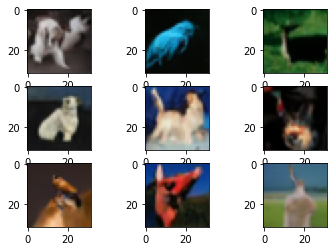

In [6]:
#To test
diffusion = GaussianDiffusion(
    model,
    image_size = 32,           #Try the other set instead
    timesteps = 1000,           # number of steps 
    sampling_timesteps = 1000,   # number of sampling timesteps (using ddim for faster inference [see citation for ddim paper])
    loss_type = 'l1'            # L1 or L2
).cuda()


sampled_images = diffusion.sample(batch_size = 9)



f = plt.figure()
for i in range(9):
  f.add_subplot(3, 3, i + 1)
  temp=sampled_images[i]
  temp=temp.detach().cpu()
  print(temp.shape)
  temp = temp.swapaxes(0,1)
  temp = temp.swapaxes(1,2)
  
  plt.imshow(temp)

plt.show(block=True)